# EDA ON Geolocational Data

In [32]:
import pandas as pd
import seaborn as sns
import numpy as np

In [33]:
data=pd.read_csv("food_coded.csv")
data.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


# DATA CLEANING

In [3]:
data.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

In [4]:
column=['cook','eating_out','employment','ethnic_food', 'exercise','fruit_day','income','on_off_campus','pay_meal_out','sports','veggies_day']

In [5]:
d=data[column]
d.head()

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4


# Data Visualization

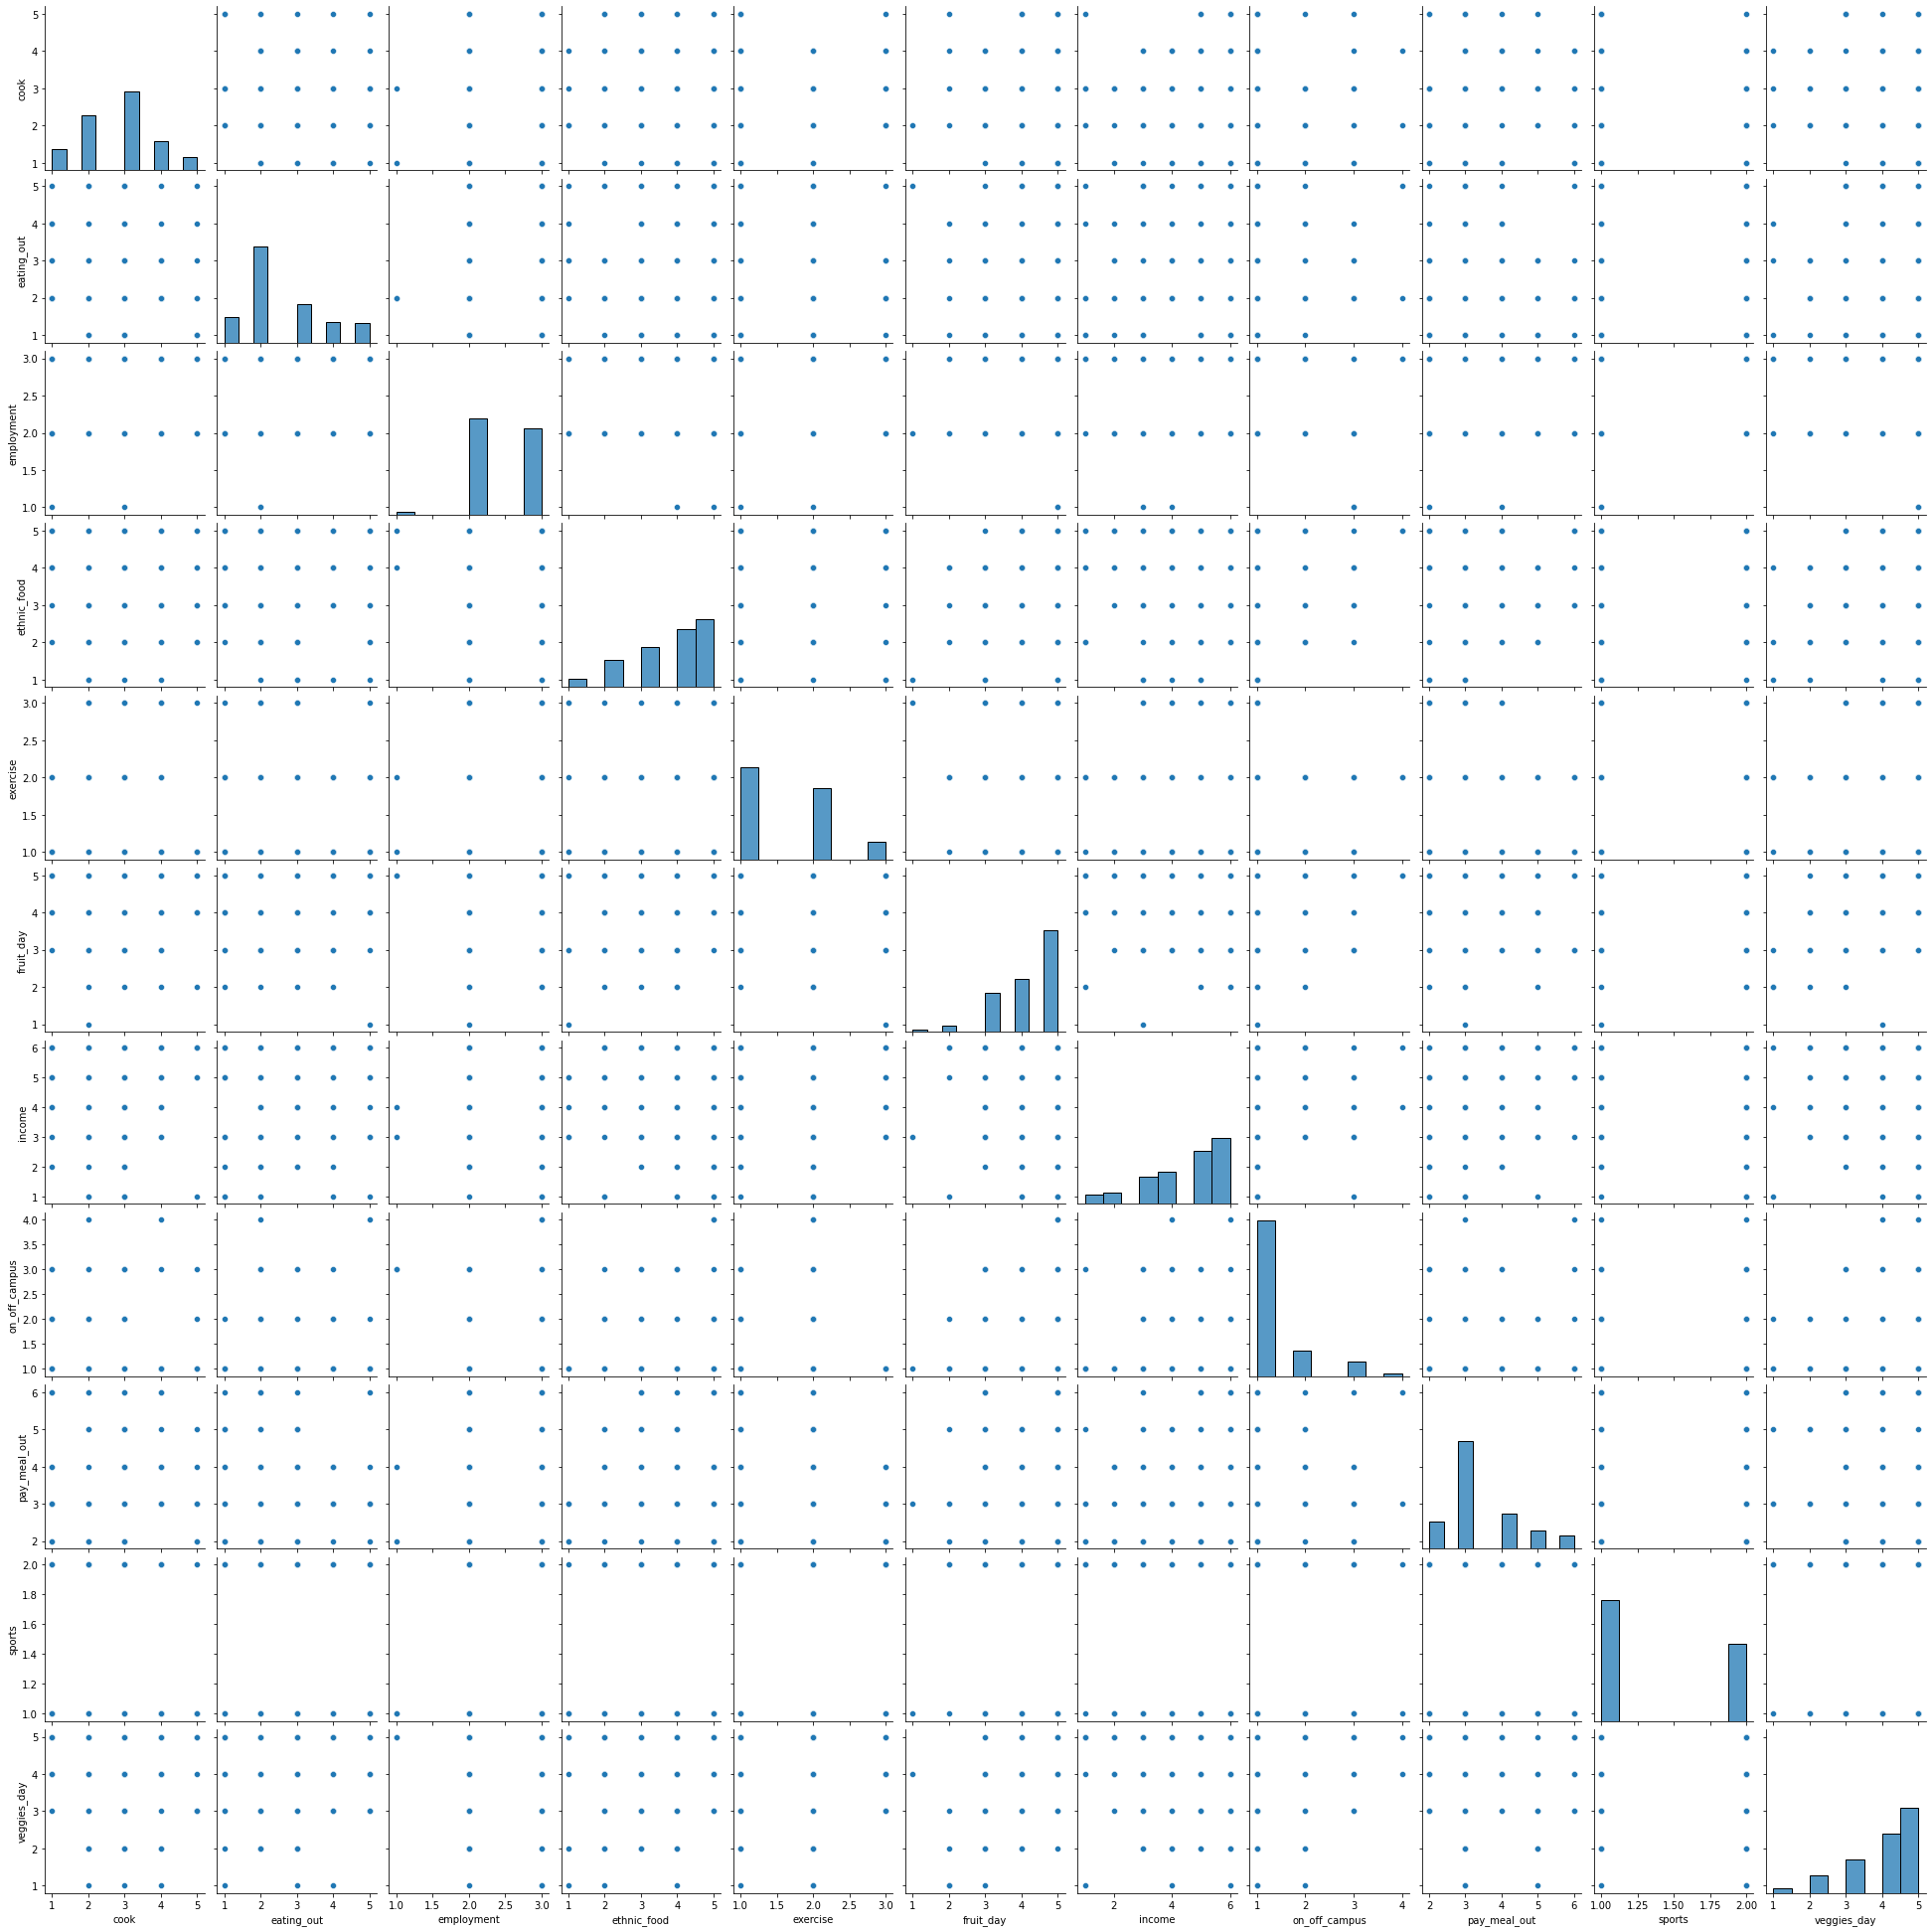

In [6]:
sns.pairplot(d)


# BOX Plot

[Text(1, 0, 'cook'),
 Text(2, 0, 'eating_out'),
 Text(3, 0, 'employment'),
 Text(4, 0, 'ethnic_food'),
 Text(5, 0, 'exercise'),
 Text(6, 0, 'fruit_day'),
 Text(7, 0, 'income'),
 Text(8, 0, 'on_off_campus'),
 Text(9, 0, 'pay_meal_out'),
 Text(10, 0, 'sports'),
 Text(11, 0, 'veggies_day')]

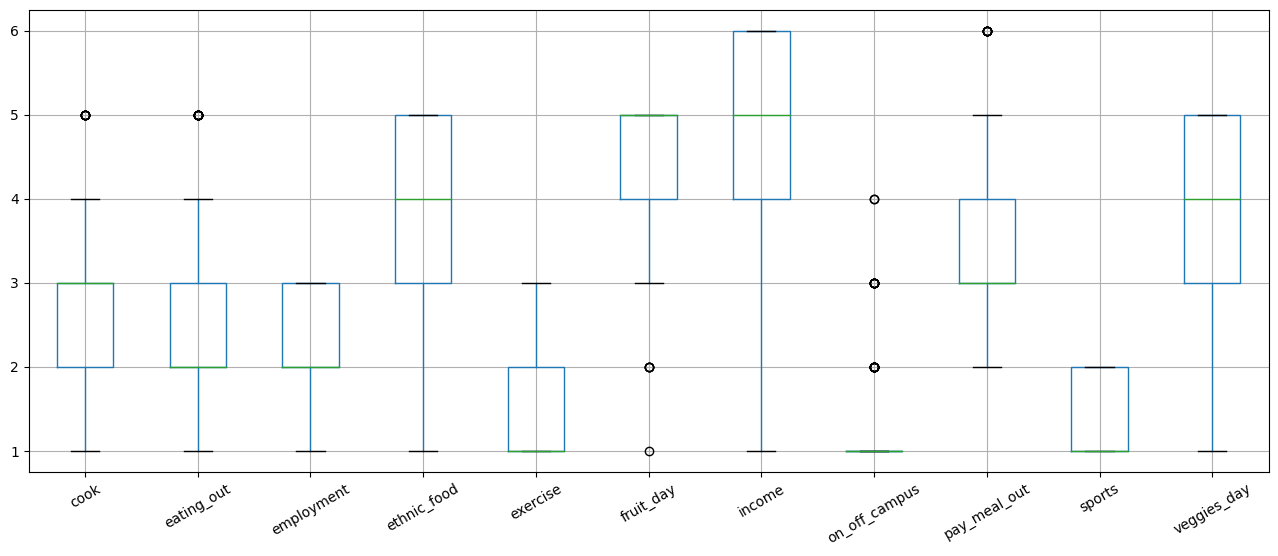

In [7]:
import matplotlib.pyplot as plt   
ax=d.boxplot(figsize=(16,6))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

In [8]:
d.shape

(125, 11)

In [9]:
s=d.dropna()


# Run K-Means

In [11]:
## for data
import numpy as np
import pandas as pd
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for geospatial
import folium
import geopy
## for machine learning
from sklearn import preprocessing, cluster
import scipy
## for deep learning
import minisom

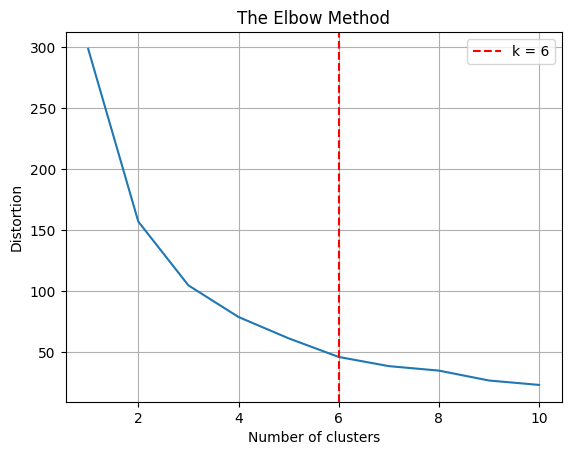

In [12]:
fcp=['cook','income']
X = s[fcp]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

# Getting GeoLocational Data

In [13]:
from pandas.io.json import json_normalize
import folium as f
from geopy.geocoders import Nominatim 
import requests


In [14]:
CLIENT_ID='5XTKK2W51HSV3ON2KCZNRDM13GY5SAETOHRT5EOEZZAMRXLZ'
CLIENT_SECRET='POGKGQXORUNGLSLB1EQ5CAOD2HU4VG5XLNP3EHLBQ1Y4YIOM'
search_query = 'building' #Search for residential locations
radius = 100000
latitude= 18.5204
longitude= 73.8567
VERSION = '20200604'
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET,latitude, longitude, VERSION, search_query,radius,LIMIT)


In [15]:
results = requests.get(url).json()
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

C:\Users\Gopesh\AppData\Local\Temp/ipykernel_8888/2085164890.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  dataframe = json_normalize(venues)


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet
0,519099c0498e836c588f27d4,"A building,Adinath Society","[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",v-1652859855,False,Adinath Society,18.491237,73.862837,"[{'label': 'display', 'lat': 18.49123678254988...",3310,411037,IN,Pune,Mahārāshtra,India,"[Adinath Society, Pune 411037, Mahārāshtra, In...",NaN
1,53be70bd498e40af6493fc77,"design building workshop, deolankar wada","[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",v-1652859855,False,"423, Shaniwar Peth",18.518549,73.851638,"[{'label': 'display', 'lat': 18.51854948127222...",572,411030,IN,Pune,Mahārāshtra,India,"[423, Shaniwar Peth (Near Bank Of Maharashtra)...",Near Bank Of Maharashtra
2,4bf3bd0a370e76b05a6fbd4a,PMC Building,"[{'id': '4bf58dd8d48988d129941735', 'name': 'C...",v-1652859855,False,Congress House Rd.,18.524099,73.853137,"[{'label': 'display', 'lat': 18.52409881274284...",557,411005,IN,Pune,Mahārāshtra,India,"[Congress House Rd., Pune 411005, Mahārāshtra,...",NaN
3,50f56593e4b012b119af91b1,biziland building,"[{'id': '50be8ee891d4fa8dcc7199a7', 'name': 'M...",v-1652859855,False,biziland building,18.513817,73.852896,"[{'label': 'display', 'lat': 18.51381654772701...",835,411030,IN,Pune,Mahārāshtra,India,"[biziland building (kumthekar road), Pune 4110...",kumthekar road
4,51909fe0498e8e2a657cc974,"N Building, Adinath Society","[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",v-1652859855,False,Adinath Society,18.490757,73.862244,"[{'label': 'display', 'lat': 18.49075698852539...",3351,411037,IN,Pune,Mahārāshtra,India,"[Adinath Society, Pune 411037, Mahārāshtra, In...",NaN


In [16]:
dataframe.shape

(50, 17)

In [17]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
#print(dataframe_filtered.columns)
dataframe_filtered.drop([4,17,18],axis=0,inplace=True) #remove some unwanted locations like hotels
dataframe_filtered.drop(['cc','country','state','city'],axis=1,inplace=True) #no need for those columns as we know we're in Bangalore,IN
dataframe_filtered.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,formattedAddress,crossStreet,id
0,"A building,Adinath Society",Building,Adinath Society,18.491237,73.862837,"[{'label': 'display', 'lat': 18.49123678254988...",3310,411037,"[Adinath Society, Pune 411037, Mahārāshtra, In...",NaN,519099c0498e836c588f27d4
1,"design building workshop, deolankar wada",Office,"423, Shaniwar Peth",18.518549,73.851638,"[{'label': 'display', 'lat': 18.51854948127222...",572,411030,"[423, Shaniwar Peth (Near Bank Of Maharashtra)...",Near Bank Of Maharashtra,53be70bd498e40af6493fc77
2,PMC Building,City Hall,Congress House Rd.,18.524099,73.853137,"[{'label': 'display', 'lat': 18.52409881274284...",557,411005,"[Congress House Rd., Pune 411005, Mahārāshtra,...",NaN,4bf3bd0a370e76b05a6fbd4a
3,biziland building,Market,biziland building,18.513817,73.852896,"[{'label': 'display', 'lat': 18.51381654772701...",835,411030,"[biziland building (kumthekar road), Pune 4110...",kumthekar road,50f56593e4b012b119af91b1
5,Building No. 3,Residential Building (Apartment / Condo),Konark Nagar,18.567808,73.909576,"[{'label': 'display', 'lat': 18.56780815124511...",7680,411014,"[Konark Nagar (Viman Nagar), Pune 411014, Mahā...",Viman Nagar,50574b62e4b01ef8233e65d9


In [18]:
#define coordinates of the college
map_bang=f.Map(location=[18.5204,73.8567],zoom_start=12)
# instantiate a feature group for the incidents in the dataframe
locations = f.map.FeatureGroup()

latitudes = list(dataframe_filtered.lat)
longitudes = list( dataframe_filtered.lng)
labels = list(dataframe_filtered.name)

for lat, lng, label in zip(latitudes, longitudes, labels):
    f.Marker([lat, lng], popup=label).add_to(map_bang)    
    
# add incidents to map
map_bang.add_child(locations)

# add incidents to map
map_bang.add_child(locations)

map_bang

# Adding two more columns Rest and other

In [19]:
df_evaluate=dataframe_filtered[['lat','lng']]

In [20]:
RestList=[]
latitudes = list(dataframe_filtered.lat)
longitudes = list( dataframe_filtered.lng)
for lat, lng in zip(latitudes, longitudes):    
    radius = 100000
    latitude=lat#Query for the apartment location in question
    longitude=lng
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    search_query = 'Restaurant' #Search for any food related locations
    results = requests.get(url).json()
    # assign relevant part of JSON to venues
    venues = results['response']['venues']
    # tranform venues into a dataframe
    dataframe2 = json_normalize(venues)
    filtered_columns = ['name', 'categories'] + [col for col in dataframe2.columns if col.startswith('location.')] + ['id']
    dataframe_filtered2 = dataframe2.loc[:, filtered_columns]
    # filter the category for each row
    dataframe_filtered2['categories'] = dataframe_filtered2.apply(get_category_type, axis=1)
    # clean column names by keeping only last term
    dataframe_filtered2.columns = [column.split('.')[-1] for column in dataframe_filtered2.columns]
    RestList.append(dataframe_filtered2['categories'].count())

C:\Users\Gopesh\AppData\Local\Temp/ipykernel_8888/1540259652.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  dataframe2 = json_normalize(venues)
C:\Users\Gopesh\AppData\Local\Temp/ipykernel_8888/1540259652.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  dataframe2 = json_normalize(venues)
C:\Users\Gopesh\AppData\Local\Temp/ipykernel_8888/1540259652.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  dataframe2 = json_normalize(venues)
C:\Users\Gopesh\AppData\Local\Temp/ipykernel_8888/1540259652.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  dataframe2 = json_normalize(venues)
C:\Users\Gopesh\AppData\Local\Temp/ipykernel_8888/1540259652.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  dataframe2 = json_normalize(ven

C:\Users\Gopesh\AppData\Local\Temp/ipykernel_8888/1540259652.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  dataframe2 = json_normalize(venues)
C:\Users\Gopesh\AppData\Local\Temp/ipykernel_8888/1540259652.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  dataframe2 = json_normalize(venues)
C:\Users\Gopesh\AppData\Local\Temp/ipykernel_8888/1540259652.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  dataframe2 = json_normalize(venues)
C:\Users\Gopesh\AppData\Local\Temp/ipykernel_8888/1540259652.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  dataframe2 = json_normalize(venues)
C:\Users\Gopesh\AppData\Local\Temp/ipykernel_8888/1540259652.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  dataframe2 = json_normalize(ven

In [21]:
df_evaluate['Restaurants']=RestList

C:\Users\Gopesh\AppData\Local\Temp/ipykernel_8888/2266172772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_evaluate['Restaurants']=RestList


In [22]:
FruitList=[]
latitudes = list(dataframe_filtered.lat)
longitudes = list( dataframe_filtered.lng)
for lat, lng in zip(latitudes, longitudes):    
    radius = 100000
    latitude=lat#Query for the apartment location in question
    longitude=lng
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    search_query = 'food' #Search for any food related locations
    results = requests.get(url).json()
    # assign relevant part of JSON to venues
    venues = results['response']['venues']
    # tranform venues into a dataframe
    dataframe2 = json_normalize(venues)
    filtered_columns = ['name', 'categories'] + [col for col in dataframe2.columns if col.startswith('location.')] + ['id']
    dataframe_filtered2 = dataframe2.loc[:, filtered_columns]
    # filter the category for each row
    dataframe_filtered2['categories'] = dataframe_filtered2.apply(get_category_type, axis=1)
    # clean column names by keeping only last term
    dataframe_filtered2.columns = [column.split('.')[-1] for column in dataframe_filtered2.columns]
    FruitList.append(dataframe_filtered2['categories'].count())

C:\Users\Gopesh\AppData\Local\Temp/ipykernel_8888/3404549209.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  dataframe2 = json_normalize(venues)
C:\Users\Gopesh\AppData\Local\Temp/ipykernel_8888/3404549209.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  dataframe2 = json_normalize(venues)
C:\Users\Gopesh\AppData\Local\Temp/ipykernel_8888/3404549209.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  dataframe2 = json_normalize(venues)
C:\Users\Gopesh\AppData\Local\Temp/ipykernel_8888/3404549209.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  dataframe2 = json_normalize(venues)
C:\Users\Gopesh\AppData\Local\Temp/ipykernel_8888/3404549209.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  dataframe2 = json_normalize(ven

C:\Users\Gopesh\AppData\Local\Temp/ipykernel_8888/3404549209.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  dataframe2 = json_normalize(venues)
C:\Users\Gopesh\AppData\Local\Temp/ipykernel_8888/3404549209.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  dataframe2 = json_normalize(venues)
C:\Users\Gopesh\AppData\Local\Temp/ipykernel_8888/3404549209.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  dataframe2 = json_normalize(venues)
C:\Users\Gopesh\AppData\Local\Temp/ipykernel_8888/3404549209.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  dataframe2 = json_normalize(venues)
C:\Users\Gopesh\AppData\Local\Temp/ipykernel_8888/3404549209.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  dataframe2 = json_normalize(ven

In [23]:
df_evaluate['Fruits,Vegetables,Groceries']=FruitList

C:\Users\Gopesh\AppData\Local\Temp/ipykernel_8888/2724016561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_evaluate['Fruits,Vegetables,Groceries']=FruitList


In [24]:
from sklearn.cluster import KMeans

# Runs K-Means on GeoData

In [25]:
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_evaluate)
df_evaluate['Cluster']=kmeans.labels_
df_evaluate['Cluster']=df_evaluate['Cluster'].apply(str)
df_evaluate

C:\Users\Gopesh\AppData\Local\Temp/ipykernel_8888/924823510.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_evaluate['Cluster']=kmeans.labels_
C:\Users\Gopesh\AppData\Local\Temp/ipykernel_8888/924823510.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_evaluate['Cluster']=df_evaluate['Cluster'].apply(str)


,lat,lng,Restaurants,"Fruits,Vegetables,Groceries",Cluster
0,18.491237,73.862837,49,50,0
1,18.518549,73.851638,49,49,0
2,18.524099,73.853137,50,47,1
3,18.513817,73.852896,49,48,1
5,18.567808,73.909576,44,49,2
6,18.522209,73.846989,49,48,1
7,18.518998,73.815396,49,48,1
8,18.517319,73.846028,49,48,1
9,18.509767,73.861427,50,48,1
10,18.513058,73.868416,49,47,1


In [26]:
#define coordinates of the college
map_bang=f.Map(location=[18.5204,73.8567],zoom_start=12)
# instantiate a feature group for the incidents in the dataframe
locations = f.map.FeatureGroup()
# set color scheme for the clusters
def color_producer(cluster):
    if cluster=='0':
        return 'green'
    elif cluster=='1':
        return 'orange'
    else:
        return 'red'
latitudes = list(df_evaluate.lat)
longitudes = list(df_evaluate.lng)
labels = list(df_evaluate.Cluster)
names=list(dataframe_filtered.name)
add = list(dataframe_filtered.formattedAddress)
rich = list()
med = list()
poor = list()
for lat, lng, label,names,ad in zip(latitudes, longitudes, labels,names,add):
    f.CircleMarker(
            [lat,lng],
            fill=True,
            fill_opacity=0.5,
            popup=f.Popup(names, max_width = 300),
            radius=10,
            color=color_producer(label)
        ).add_to(map_bang)
    if label == '0' :
        rich.append([names,add[0]])
    elif label == '1' :
        med.append([names,add[0]])
    else:
        poor.append([names,add[0]])


# add locations to map
f.Marker([18.5204,73.8567],popup='Pinned Location').add_to(map_bang)
map_bang.add_child(locations)
map_bang


#saving the map 
map_bang.save("answ.html")

Applying K-Means, we find 3 prominent clusters:

Cluster 0(Green) Where both gym and (restaurants) are abundant

Cluster 1(Yellow): Restaurants are plentiful, but gym less so.

Cluster 2(Red): Restaurants and gym are relatively hard to find.

Now, one can easily predict where which kind of student will prefer to stay!

In [27]:
data = dict()
data['rich']=rich
data['med']=med
data['poor']=poor

In [28]:
import json


In [29]:
with open('data.json', 'w') as jsonfile:
    json.dump(data, jsonfile)
